In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(np.float64(-0.5), np.float64(3059.5), np.float64(4079.5), np.float64(-0.5))

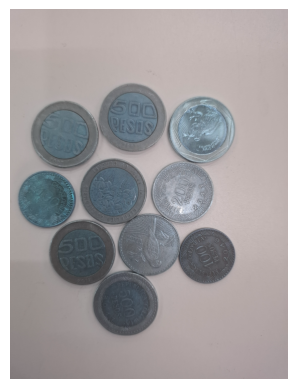

In [19]:
img = cv2.imread('monedas.jpg')
plt.imshow(img)
plt.axis('off')

(np.float64(-0.5), np.float64(3059.5), np.float64(4079.5), np.float64(-0.5))

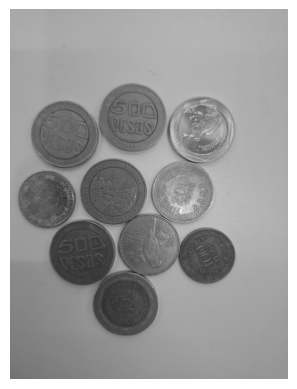

In [ ]:
def change_min_max(img, min_val, max_val):
    img2 = ((max_val - min_val) / 255) * img  + min_val    
    return img2.astype(np.uint8)

img = change_min_max(img, 0, 128)
plt.imshow(img, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(3059.5), np.float64(4079.5), np.float64(-0.5))

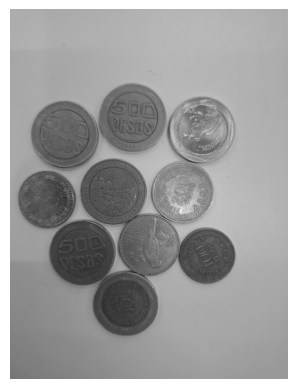

In [20]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(img_hsv)

# 4. Reducir brillo (V) y saturación (S)
h = np.clip(h * 0.5, 0, 255).astype(np.uint8)  # Reduce tono al 50%
v = np.clip(v * 0.3, 0, 255).astype(np.uint8)  # Reduce brillo al 50%
s = np.clip(s * 0.1, 0, 255).astype(np.uint8)  # Reduce saturación al 50%

# 5. Recomponer y volver a BGR
hsv_modified = cv2.merge([h, s, v])
img2 = cv2.cvtColor(hsv_modified, cv2.COLOR_HSV2BGR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)  # Convertir a RGB para matplotlib

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(img_gray, cmap='gray')
plt.axis('off')



Ahora se binariza la imagen

(np.float64(-0.5), np.float64(3059.5), np.float64(4079.5), np.float64(-0.5))

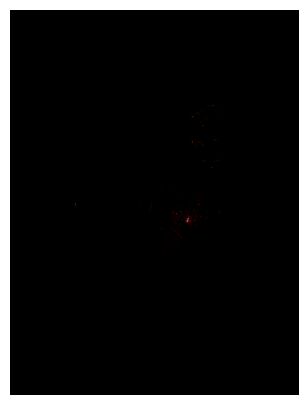

In [5]:
imgbin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
plt.figure(figsize=(10, 5))
plt.imshow(imgbin, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

Se invierten las intensidades

(np.float64(-0.5), np.float64(3059.5), np.float64(4079.5), np.float64(-0.5))

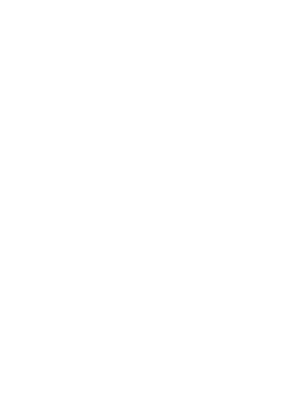

In [110]:
imgbin2 = 255 - imgbin
plt.figure(figsize=(10, 5))
plt.imshow(imgbin2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

Se procede a erosionar la imagen

(np.float64(-0.5), np.float64(3059.5), np.float64(4079.5), np.float64(-0.5))

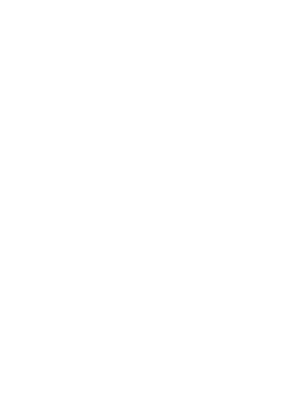

In [111]:
imgbin2_erosion = cv2.erode(imgbin2, np.ones((5, 5), np.uint8), iterations=4)
plt.figure(figsize=(10, 5))
plt.imshow(imgbin2_erosion, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

In [112]:
_, markers = cv2.connectedComponents(imgbin2_erosion)

In [113]:
np.unique(markers)

array([1], dtype=int32)